In [1]:
import numpy as np
import glob
import os

def merge_npz_to_single_npy(data_dir='../data/processed', data_out='Combined_holistic_landmarks_data.npy', labels_out='Combined_holistic_landmarks_labels.npy'):
    npz_files = sorted(glob.glob(os.path.join(data_dir, "holistic_landmarks_*.npz")))

    all_data = []
    all_labels = []

    print(f"Found {len(npz_files)} files to process...\n")

    for i, file in enumerate(npz_files):
        try:
            npz = np.load(file, allow_pickle=True)
            data_batch = np.array(npz['X'], dtype=object)
            labels_batch = np.array(npz['y'])

            print(f"[{i+1}/{len(npz_files)}] Loaded {file} — data shape: {data_batch.shape}, label shape: {labels_batch.shape}")

            all_data.append(data_batch)
            all_labels.append(labels_batch)

        except Exception as e:
            print(f"Error loading file {file}: {type(e).__name__}: {e}")
            break

    print("\nLoaded all files (except failed ones).")
    for i, d in enumerate(all_data):
        print(f" - Batch {i}: shape={d.shape}, dtype={d.dtype}")

    if not all_data or not all_labels:
        print("No valid data found. Exiting.")
        return

    try:
        full_data = np.concatenate(all_data, axis=0)
        full_labels = np.concatenate(all_labels, axis=0)
        print("Data concatenated successfully.")
    except Exception as e:
        print(f"Concatenation failed: {e}")
        return

    print("\n✅ Done saving combined files!")
    print(f"Final Landmarks shape: {full_data.shape}")
    print(f"Final Labels shape: {full_labels.shape}")
    return full_data, full_labels

combined_landmarks, combined_labels = merge_npz_to_single_npy()


Found 43 files to process...

[1/43] Loaded ../data/processed/holistic_landmarks_Adjectives_1of8.npz — data shape: (5991,), label shape: (5991,)
[2/43] Loaded ../data/processed/holistic_landmarks_Adjectives_2of8.npz — data shape: (6596,), label shape: (6596,)
[3/43] Loaded ../data/processed/holistic_landmarks_Adjectives_3of8.npz — data shape: (6636,), label shape: (6636,)
[4/43] Loaded ../data/processed/holistic_landmarks_Adjectives_4of8.npz — data shape: (5617,), label shape: (5617,)
[5/43] Loaded ../data/processed/holistic_landmarks_Adjectives_5of8.npz — data shape: (6042,), label shape: (6042,)
[6/43] Loaded ../data/processed/holistic_landmarks_Adjectives_6of8.npz — data shape: (5848,), label shape: (5848,)
[7/43] Loaded ../data/processed/holistic_landmarks_Adjectives_7of8.npz — data shape: (5833,), label shape: (5833,)
[8/43] Loaded ../data/processed/holistic_landmarks_Adjectives_8of8.npz — data shape: (3861,), label shape: (3861,)
[9/43] Loaded ../data/processed/holistic_landmarks

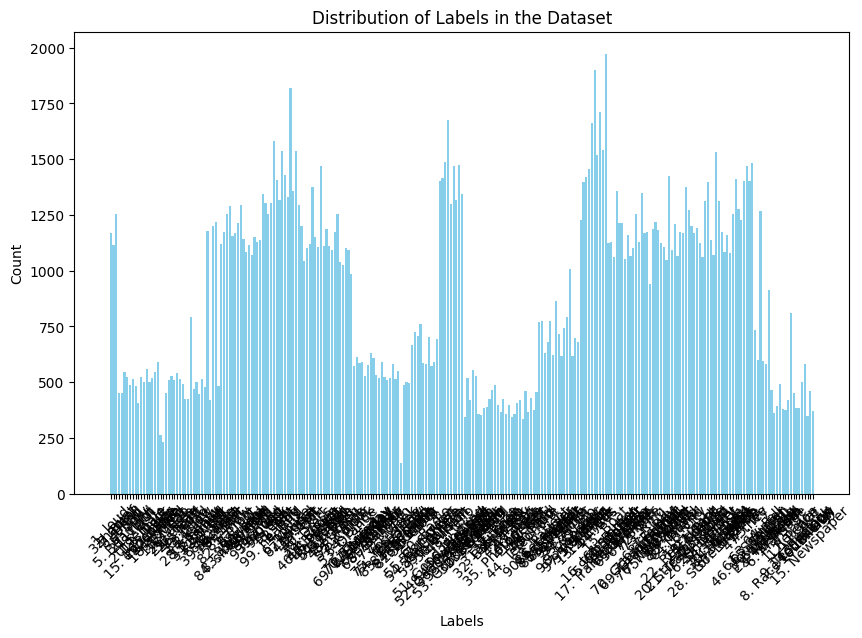

Label Distribution:
Label: 1. loud, Count: 1167
Label: 3. happy, Count: 1113
Label: 2. quiet, Count: 1253
Label: 7. Deaf, Count: 450
Label: 8. Blind, Count: 452
Label: 5. Beautiful, Count: 545
Label: 4. sad, Count: 523
Label: 6. Ugly, Count: 488
Label: 21. tight, Count: 514
Label: 11. rich, Count: 483
Label: 20. female, Count: 406
Label: 15. expensive, Count: 521
Label: 19. male, Count: 500
Label: 13. thick, Count: 558
Label: 16. cheap, Count: 502
Label: 12. poor, Count: 519
Label: 22. loose, Count: 547
Label: 18. curved, Count: 588
Label: 14. thin, Count: 263
Label: 9. Nice, Count: 231
Label: 10. Mean, Count: 453
Label: 17. flat, Count: 511
Label: 27. deep, Count: 527
Label: 29. clean, Count: 508
Label: 30. dirty, Count: 543
Label: 26. hard, Count: 514
Label: 25. soft, Count: 492
Label: 33. dead, Count: 426
Label: 34. alive, Count: 426
Label: 28. shallow, Count: 792
Label: 24. low, Count: 470
Label: 35. heavy, Count: 501
Label: 31. strong, Count: 445
Label: 23. high, Count: 512
Label:

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each label
label_counts = Counter(combined_labels)

# Get the unique labels and their counts
labels, counts = zip(*label_counts.items())

# Plotting the label distribution
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.xticks(rotation=45)
plt.show()


# Alternatively, you can print the counts
print("Label Distribution:")
for label, count in label_counts.items():
    print(f'Label: {label}, Count: {count}')

In [3]:
# Check for missing items in landmarks
missing_landmarks = []
for i, landmark in enumerate(combined_landmarks):
    if isinstance(landmark, np.ndarray):
        if np.any(np.isnan(landmark)):
            missing_landmarks.append(i)

# Check for missing labels (None or empty strings)
missing_labels = [i for i, label in enumerate(combined_labels) if label is None or label == '']

# Count missing items
num_missing_landmarks = len(missing_landmarks)
num_missing_labels = len(missing_labels)

# Print the results
print(f'Total missing landmarks: {num_missing_landmarks}')
print(f'Total missing labels: {num_missing_labels}')

# Optionally, find the indices of the missing items
print(f'Indices of missing landmarks: {missing_landmarks}')
print(f'Indices of missing labels: {missing_labels}')

Total missing landmarks: 0
Total missing labels: 0
Indices of missing landmarks: []
Indices of missing labels: []


## Data processing

In [4]:
from collections import Counter

# Get shapes of each valid landmark array
landmark_shapes = [
    tuple(np.array(landmark).shape)
    for landmark in combined_landmarks
    if isinstance(landmark, list) or isinstance(landmark, np.ndarray)
]

# Count how many times each shape occurs
shape_counts = Counter(landmark_shapes)

# Report counts
print("📊 Landmark shape frequency:")
for shape, count in sorted(shape_counts.items()):
    status = "✅ OK" if shape == (543, 3) else "⚠️  Incomplete"
    print(f"  {shape}: {count} entries {status}")

# Count how many were incomplete
num_incomplete = sum(count for shape, count in shape_counts.items() if shape != (543, 3))
num_total = sum(shape_counts.values())
num_complete = shape_counts.get((543, 3), 0)

print(f"\n✅ Total complete entries (543,3): {num_complete}")
print(f"⚠️ Total incomplete entries: {num_incomplete}")
print(f"📦 Total samples processed: {num_total}")


📊 Landmark shape frequency:
  (33, 3): 6 entries ⚠️  Incomplete
  (54, 3): 15 entries ⚠️  Incomplete
  (75, 3): 93 entries ⚠️  Incomplete
  (501, 3): 20942 entries ⚠️  Incomplete
  (522, 3): 54128 entries ⚠️  Incomplete
  (543, 3): 152009 entries ✅ OK

✅ Total complete entries (543,3): 152009
⚠️ Total incomplete entries: 75184
📦 Total samples processed: 227193


In [5]:
from collections import defaultdict

# Sanity check
assert len(combined_landmarks) == len(combined_labels)

# Initialize dictionary
label_stats = defaultdict(lambda: {'complete': 0, 'incomplete': 0})

# Analyze raw shapes before any padding/truncating
for i, landmark in enumerate(combined_landmarks):
    label = combined_labels[i]
    shape = np.array(landmark).shape if isinstance(landmark, list) else ()

    if shape == (543, 3):
        label_stats[label]['complete'] += 1
    else:
        label_stats[label]['incomplete'] += 1

# Display header
print(f"{'Label':25} {'Total':>7} {'% Complete':>12} {'% Incomplete':>13}")
print("-" * 60)

# Print label-wise stats
for label, stats in sorted(label_stats.items()):
    total = stats['complete'] + stats['incomplete']
    pct_complete = (stats['complete'] / total) * 100
    pct_incomplete = (stats['incomplete'] / total) * 100

    print(f"{label:25} {total:7} {pct_complete:11.2f}% {pct_incomplete:12.2f}%")


Label                       Total   % Complete  % Incomplete
------------------------------------------------------------
1. Dog                       1536       59.70%        40.30%
1. Religion                   808       75.00%        25.00%
1. loud                      1167       76.78%        23.22%
10. Energy                    348       64.66%        35.34%
10. Mean                      453       80.13%        19.87%
10. Plane                    1397       62.78%        37.22%
11. Car                      1899       59.82%        40.18%
11. War                       383       76.50%        23.50%
11. rich                      483       72.26%        27.74%
12. Peace                     449       75.06%        24.94%
12. Truck                    1660       62.95%        37.05%
12. poor                      519       66.86%        33.14%
13. Attack                    582       77.15%        22.85%
13. Bicycle                  1420       54.44%        45.56%
13. thick               

In [6]:
from collections import defaultdict, Counter
import numpy as np

def clean_and_interpolate_landmarks(landmarks, labels):
    assert len(landmarks) == len(labels)

    # Shapes to exclude outright
    exclude_shapes = {(33, 3), (54, 3), (75, 3)}
    target_shape = (543, 3)

    label_stats = defaultdict(lambda: {'complete': [], 'incomplete': []})

    # First, group by label
    for lm, lbl in zip(landmarks, labels):
        shape = np.array(lm).shape
        if shape == target_shape:
            label_stats[lbl]['complete'].append(np.array(lm))
        elif shape not in exclude_shapes:
            label_stats[lbl]['incomplete'].append(np.array(lm))

    clean_landmarks = []
    clean_labels = []

    for lbl, stats in label_stats.items():
        complete = stats['complete']
        incomplete = stats['incomplete']
        total = len(complete) + len(incomplete)

        if total == 0:
            continue

        pct_incomplete = (len(incomplete) / total) * 100

        # Skip label if more than 45% data is incomplete
        if pct_incomplete > 45:
            print(f"⛔ Skipping label '{lbl}' due to {pct_incomplete:.2f}% incomplete data")
            continue

        # Keep complete entries
        clean_landmarks.extend(complete)
        clean_labels.extend([lbl] * len(complete))

        # Interpolate incomplete entries using mean from complete entries
        if complete:
            reference_mean = np.mean(complete, axis=0)  # (543, 3)

            for partial in incomplete:
                padded = np.zeros(target_shape)

                # Fill existing keypoints
                valid_len = min(partial.shape[0], 543)
                padded[:valid_len] = partial[:valid_len]

                # Fill remaining with mean values
                if valid_len < 543:
                    padded[valid_len:] = reference_mean[valid_len:]

                clean_landmarks.append(padded)
                clean_labels.append(lbl)

    print(f"\n✅ Cleaned dataset: {len(clean_landmarks)} samples")
    return np.array(clean_landmarks), np.array(clean_labels)

combined_landmarks, combined_labels = clean_and_interpolate_landmarks(combined_landmarks, combined_labels)

print(f"✅ Final cleaned shape: {combined_landmarks.shape}")
print(f"✅ Labels shape: {combined_labels.shape}")

landmark_shapes = [
    tuple(np.array(landmark).shape)
    for landmark in combined_landmarks
    if isinstance(landmark, list) or isinstance(landmark, np.ndarray)
]

# Count how many times each shape occurs
shape_counts = Counter(landmark_shapes)

# Report counts
print("📊 Landmark shape frequency:")
for shape, count in sorted(shape_counts.items()):
    status = "✅ OK" if shape == (543, 3) else "⚠️  Incomplete"
    print(f"  {shape}: {count} entries {status}")

# Count how many were incomplete
num_incomplete = sum(count for shape, count in shape_counts.items() if shape != (543, 3))
num_total = sum(shape_counts.values())
num_complete = shape_counts.get((543, 3), 0)

print(f"\n✅ Total complete entries (543,3): {num_complete}")
print(f"⚠️ Total incomplete entries: {num_incomplete}")
print(f"📦 Total samples processed: {num_total}")

⛔ Skipping label '22. loose' due to 45.34% incomplete data
⛔ Skipping label '17. flat' due to 55.19% incomplete data
⛔ Skipping label '27. deep' due to 45.92% incomplete data
⛔ Skipping label '31. strong' due to 65.17% incomplete data
⛔ Skipping label '23. high' due to 45.31% incomplete data
⛔ Skipping label '78. long' due to 47.62% incomplete data
⛔ Skipping label '82. narrow' due to 50.76% incomplete data
⛔ Skipping label '87. hot' due to 49.79% incomplete data
⛔ Skipping label '7. Horse' due to 48.38% incomplete data
⛔ Skipping label '69. Wednesday' due to 58.39% incomplete data
⛔ Skipping label '68. Tuesday' due to 45.65% incomplete data
⛔ Skipping label '77. Month' due to 49.90% incomplete data
⛔ Skipping label '76. Week' due to 48.97% incomplete data
⛔ Skipping label '86. Time' due to 50.27% incomplete data
⛔ Skipping label '26. Bed' due to 45.97% incomplete data
⛔ Skipping label '36. Soap' due to 62.57% incomplete data
⛔ Skipping label '40. Paint' due to 53.43% incomplete data
⛔

In [7]:
fixed_landmarks = []

for landmark in combined_landmarks:
    landmark_array = np.array(landmark)
    if landmark_array.shape[0] < 543:
        padded = np.pad(landmark_array, ((0, 543 - landmark_array.shape[0]), (0, 0)), mode='constant')
        fixed_landmarks.append(padded)
    elif landmark_array.shape[0] > 543:
        truncated = landmark_array[:543]
        fixed_landmarks.append(truncated)
    else:
        fixed_landmarks.append(landmark_array)

# Validate and convert
assert all(arr.shape == (543, 3) for arr in fixed_landmarks), "Shape mismatch detected!"
x_fixed = np.array(fixed_landmarks)
print(f"✅ Fixed landmarks shape: {x_fixed.shape}")


✅ Fixed landmarks shape: (200702, 543, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
import joblib

# Normalize the data
scaler = StandardScaler()
landmarks_data_scaled = scaler.fit_transform(x_fixed.reshape(-1, x_fixed.shape[-1]))  # Flatten for scaling
landmarks_data_scaled = landmarks_data_scaled.reshape(x_fixed.shape)  # Reshape back to original
print(f'Scaled landmarks shape: {landmarks_data_scaled.shape}')


Scaled landmarks shape: (200702, 543, 3)


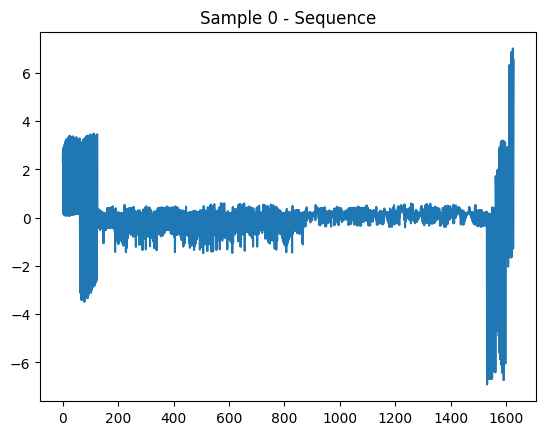

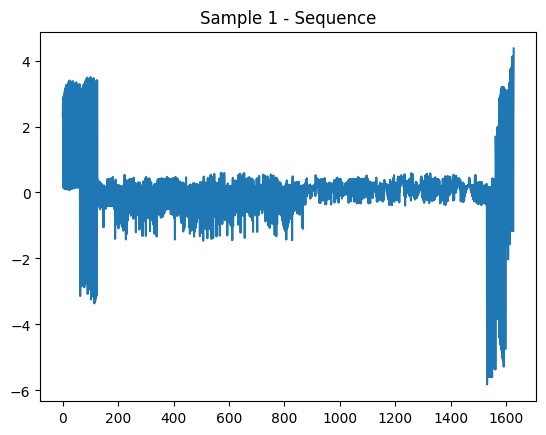

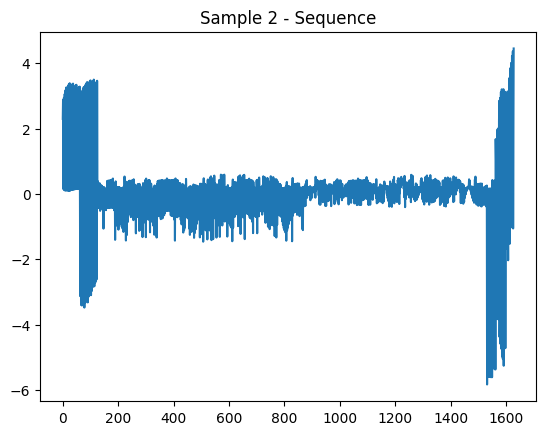

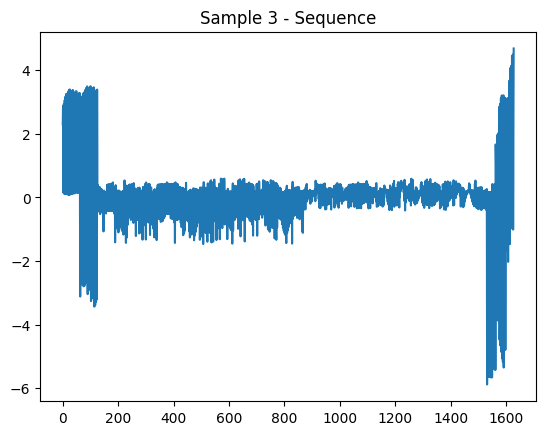

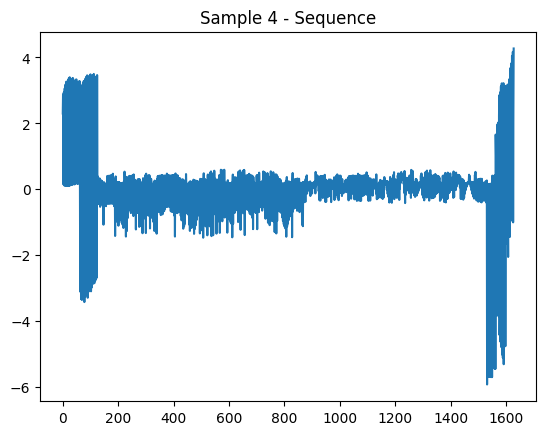

In [9]:
import matplotlib.pyplot as plt

# Check for the sequences with the highest and lowest values
for i in range(5):
    plt.plot(landmarks_data_scaled[i].flatten())
    plt.title(f"Sample {i} - Sequence")
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(landmarks_data_scaled, combined_labels, test_size=0.2, random_state=42)

# Print the shapes of the split data
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (160561, 543, 3)
x_test shape: (40141, 543, 3)
y_train shape: (160561,)
y_test shape: (40141,)


## Artifically Creating Data using SMOTE and then Train and Test Split

In [11]:
from imblearn.over_sampling import SMOTE

# Oversample the minority classes using SMOTE (Synthetic Minority Over-sampling Technique.)
# This method uses KNN of minority class samples and creates new synthetic examples along the lines of samples and its neighbours
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train.reshape((x_train.shape[0], -1)), y_train)
x_train_resampled = x_train_resampled.reshape((x_train_resampled.shape[0], x_train.shape[1], x_train.shape[2]))

# Print the shapes of the split data
print(f"x_train shape: {x_train_resampled.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train_resampled.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (342616, 543, 3)
x_test shape: (40141, 543, 3)
y_train shape: (342616,)
y_test shape: (40141,)


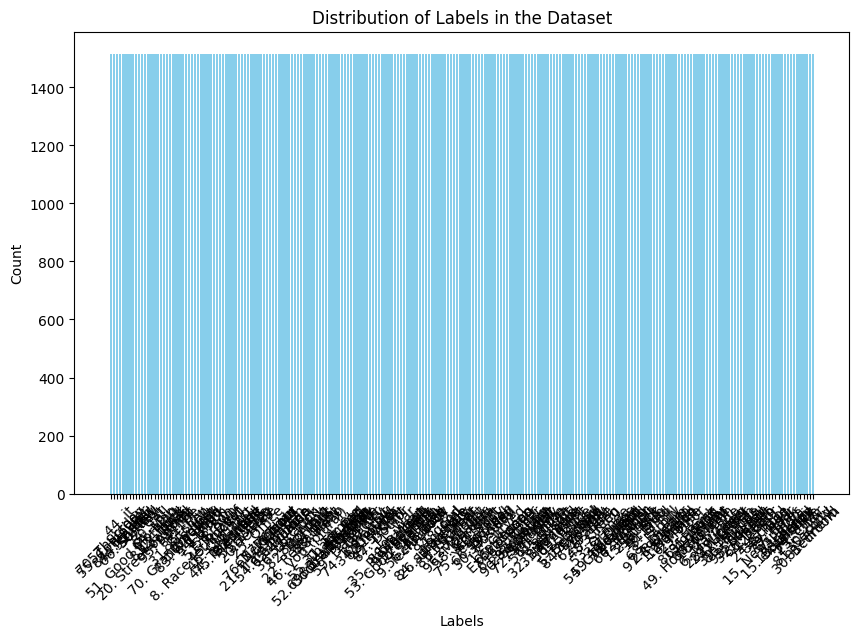

Label Distribution of Y Training:
Label: 70. Thursday, Count: 1516
Label: 55. Computer, Count: 1516
Label: 57. Screen, Count: 1516
Label: 44. it, Count: 1516
Label: 84. Teacher, Count: 1516
Label: 74. Queen, Count: 1516
Label: 66. Sunday, Count: 1516
Label: 51. Good Morning, Count: 1516
Label: 91. new, Count: 1516
Label: 50. Tool, Count: 1516
Label: 40. I, Count: 1516
Label: 20. Street or Road, Count: 1516
Label: 2. Cat, Count: 1516
Label: 80. tall, Count: 1516
Label: 64. Man, Count: 1516
Label: 83. Crowd, Count: 1516
Label: 12. Truck, Count: 1516
Label: 13. thick, Count: 1516
Label: 95. Author, Count: 1516
Label: 47. they, Count: 1516
Label: 70. Grandmother, Count: 1516
Label: 99. Job, Count: 1516
Label: 31. Kitchen, Count: 1516
Label: 42. he, Count: 1516
Label: 85. slow, Count: 1516
Label: 83. big large, Count: 1516
Label: 50. Yellow, Count: 1516
Label: 96. wet, Count: 1516
Label: 8. Race (ethnicity), Count: 1516
Label: 54. Black, Count: 1516
Label: 1. loud, Count: 1516
Label: 11. ri

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each label
label_counts = Counter(y_train_resampled)

# Get the unique labels and their counts
labels, counts = zip(*label_counts.items())

# Plotting the label distribution
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.xticks(rotation=45)
plt.show()

# Alternatively, you can print the counts
print("Label Distribution of Y Training:")
for label, count in label_counts.items():
    print(f'Label: {label}, Count: {count}')

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on y_train (since y_train contains all possible labels)
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)  # Apply the same transformation to y_test

# Check the encoded labels
print(f"Encoded y_train: {y_train_encoded[:5]}")  # Print first 5 encoded labels for reference
print(f"Encoded y_test: {y_test_encoded[:5]}")

# Also, let's map the classes for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label Mapping: {label_mapping}")

Encoded y_train: [162 127 134  93 193]
Encoded y_test: [163 167 123  77 164]
Label Mapping: {'1. Dog': 0, '1. Religion': 1, '1. loud': 2, '10. Energy': 3, '10. Mean': 4, '10. Plane': 5, '11. Car': 6, '11. War': 7, '11. rich': 8, '12. Peace': 9, '12. Truck': 10, '12. poor': 11, '13. Attack': 12, '13. thick': 13, '14. Bus': 14, '14. Election': 15, '14. thin': 16, '15. Newspaper': 17, '15. expensive': 18, '16. Gun': 19, '16. cheap': 20, '18. City': 21, '18. curved': 22, '19. House': 23, '19. male': 24, '2. Cat': 25, '2. Death': 26, '2. quiet': 27, '20. Street or Road': 28, '20. female': 29, '21. Train Station': 30, '21. tight': 31, '22. Restaurant': 32, '23. Court': 33, '24. School': 34, '24. Table': 35, '24. low': 36, '25. Chair': 37, '25. Office': 38, '25. soft': 39, '26. University': 40, '26. hard': 41, '27. Dream': 42, '28. Window': 43, '28. shallow': 44, '29. Door': 45, '29. Library': 46, '29. clean': 47, '3. Fish': 48, '3. Medicine': 49, '3. happy': 50, '30. Bedroom': 51, '30. Hospi

In [14]:
from collections import Counter

# Check the distribution of the encoded labels
print(f"y_train_encoded distribution: {Counter(y_train_encoded)}")
print(f"y_test_encoded distribution: {Counter(y_test_encoded)}")

y_train_encoded distribution: Counter({162: 1516, 127: 1516, 134: 1516, 93: 1516, 193: 1516, 167: 1516, 154: 1516, 117: 1516, 209: 1516, 113: 1516, 80: 1516, 28: 1516, 25: 1516, 183: 1516, 150: 1516, 190: 1516, 10: 1516, 13: 1516, 216: 1516, 102: 1516, 161: 1516, 223: 1516, 54: 1516, 87: 1516, 197: 1516, 191: 1516, 114: 1516, 219: 1516, 180: 1516, 124: 1516, 2: 1516, 8: 1516, 115: 1516, 136: 1516, 95: 1516, 98: 1516, 159: 1516, 92: 1516, 169: 1516, 199: 1516, 178: 1516, 58: 1516, 90: 1516, 129: 1516, 29: 1516, 130: 1516, 0: 1516, 38: 1516, 171: 1516, 30: 1516, 155: 1516, 133: 1516, 125: 1516, 160: 1516, 211: 1516, 152: 1516, 119: 1516, 68: 1516, 205: 1516, 116: 1516, 187: 1516, 32: 1516, 181: 1516, 99: 1516, 89: 1516, 14: 1516, 148: 1516, 105: 1516, 118: 1516, 128: 1516, 158: 1516, 55: 1516, 189: 1516, 15: 1516, 6: 1516, 101: 1516, 137: 1516, 50: 1516, 120: 1516, 168: 1516, 96: 1516, 21: 1516, 62: 1516, 71: 1516, 188: 1516, 186: 1516, 86: 1516, 200: 1516, 111: 1516, 66: 1516, 122: 1516

In [15]:
print(f"x_train shape: {x_train_resampled.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train_encoded.shape}")
print(f"y_test shape: {y_test_encoded.shape}")

x_train shape: (342616, 543, 3)
x_test shape: (40141, 543, 3)
y_train shape: (342616,)
y_test shape: (40141,)


In [16]:
num_classes = len(label_mapping)

## Model Training

In [17]:
from keras.models import Model
from keras.layers import (Input, Bidirectional, LSTM, BatchNormalization, Dropout, 
                          MultiHeadAttention, Flatten, Dense, LeakyReLU, Conv1D, MaxPooling1D, GlobalAveragePooling1D)
from keras.optimizers import Adam
from keras.regularizers import l2
input_shape = (x_train_resampled.shape[1], x_train_resampled.shape[2])
input_layer = Input(shape=input_shape)

#Convolution Layer
conv = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(input_layer)
conv = MaxPooling1D(pool_size=2)(conv)
# First Bidirectional LSTM layer
lstm_out1 = Bidirectional(LSTM(256, return_sequences=True))(conv)
lstm_out1 = BatchNormalization()(lstm_out1)
lstm_out1 = Dropout(0.2)(lstm_out1)  # Reduce dropout

# Second Bidirectional LSTM layer
lstm_out2 = Bidirectional(LSTM(256, return_sequences=True))(lstm_out1)
lstm_out2 = BatchNormalization()(lstm_out2)

# Third Bidirectional LSTM Layer
lstm_out3 = Bidirectional(LSTM(256, return_sequences=True))(lstm_out2)
lstm_out3 = BatchNormalization()(lstm_out3)

# Attention layer
attention_out = MultiHeadAttention(num_heads=4, key_dim=64)(lstm_out3, lstm_out3)

# Flatten the output of attention
pooled = GlobalAveragePooling1D()(attention_out)

# Dense layers with reduced L2 regularization
dense1 = Dense(128, kernel_regularizer=l2(1e-4))(pooled)
dense1 = LeakyReLU()(dense1)
dense1 = BatchNormalization()(dense1)
dense1 = Dropout(0.2)(dense1)

dense2 = Dense(64, kernel_regularizer=l2(0.1e-4))(dense1)
dense2 = LeakyReLU()(dense2)
dense2 = BatchNormalization()(dense2)
dense2 = Dropout(0.2)(dense2)

# Output layer for classification
output_layer = Dense(num_classes, activation='softmax')(dense2)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


2025-04-30 19:48:43.241763: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 19:48:43.332672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746022723.367752   78656 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746022723.378551   78656 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746022723.456903   78656 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 543, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 543, 128)  │      1,280 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 271, 128)  │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 271, 512)  │    788,480 │ max_pooling1d[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 271, 512)  │      2,048 │ bidirectional[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 271, 512)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 271, 512)  │  1,574,912 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 271, 512)  │      2,048 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 271, 512)  │  1,574,912 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 271, 512)  │      2,048 │ bidirectional_2[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 271, 512)  │    525,568 │ batch_normalizat… │
│ (MultiHeadAttentio… │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     65,664 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128)       │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ leaky_re_lu[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 64)        │          0 │ dense_1[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,560,674 (17.40 MB)

 Trainable params: 4,557,218 (17.38 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [18]:

import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    x_train_resampled,
    y_train_encoded,
    validation_data=(x_test, y_test_encoded),
    epochs=25,
    batch_size=128,
    callbacks = [early_stopping, reduce_lr]
)

if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch: {early_stopping.stopped_epoch + 1}")
    print(f"Weights restored from epoch: {early_stopping.best_epoch + 1}")
else:
    print("Training completed without early stopping.")


Epoch 1/25


I0000 00:00:1746022730.987977   98379 cuda_dnn.cc:529] Loaded cuDNN version 90300


2677/2677 ━━━━━━━━━━━━━━━━━━━━ 234s 86ms/step - accuracy: 0.1222 - loss: 4.4456 - val_accuracy: 0.5476 - val_loss: 2.0669 - learning_rate: 1.0000e-04
Epoch 2/25
2677/2677 ━━━━━━━━━━━━━━━━━━━━ 228s 85ms/step - accuracy: 0.5875 - loss: 1.8320 - val_accuracy: 0.7123 - val_loss: 1.0943 - learning_rate: 1.0000e-04
Epoch 3/25
2677/2677 ━━━━━━━━━━━━━━━━━━━━ 229s 86ms/step - accuracy: 0.7216 - loss: 1.0941 - val_accuracy: 0.7611 - val_loss: 0.8385 - learning_rate: 1.0000e-04
Epoch 4/25
2677/2677 ━━━━━━━━━━━━━━━━━━━━ 229s 85ms/step - accuracy: 0.7726 - loss: 0.8366 - val_accuracy: 0.7505 - val_loss: 0.8791 - learning_rate: 1.0000e-04
Epoch 5/25
2677/2677 ━━━━━━━━━━━━━━━━━━━━ 229s 86ms/step - accuracy: 0.8094 - loss: 0.6911 - val_accuracy: 0.8141 - val_loss: 0.6274 - learning_rate: 1.0000e-04
Epoch 6/25
2677/2677 ━━━━━━━━━━━━━━━━━━━━ 229s 85ms/step - accuracy: 0.8325 - loss: 0.5923 - val_accuracy: 0.8313 - val_loss: 0.5737 - learning_rate: 1.0000e-04
Epoch 7/25
2677/2677 ━━━━━━━━━━━━━━━━━━━━ 229

In [20]:
# Extract training and validation accuracy from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Extract training and validation loss from the history (optional)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print the final training and validation accuracy in the desired format
print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")

Final Training Accuracy: 0.9781
Final Validation Accuracy: 0.9475


1255/1255 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step


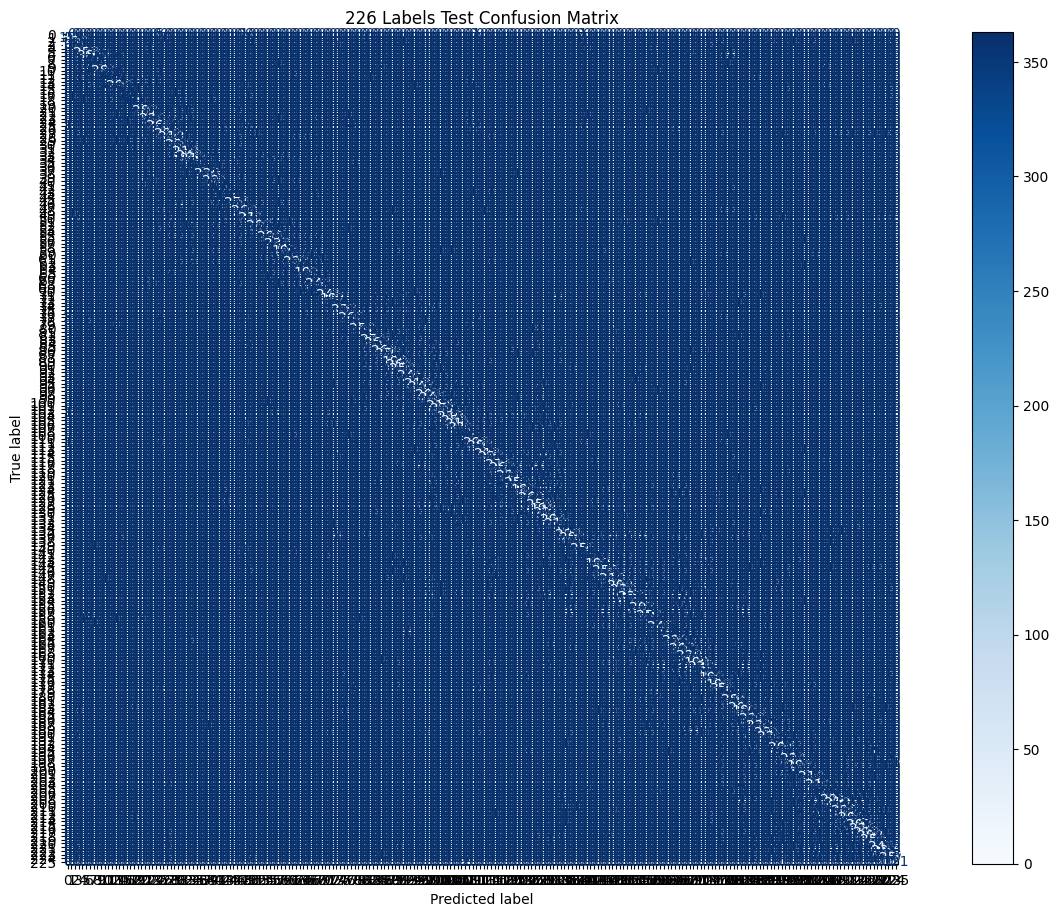

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions from the trained model (using the model, not history)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Create a figure with a high resolution (e.g., 1080x1920 pixels)
plt.figure(figsize=(19.2, 10.8))  # 1920/100 and 1080/100 for a 100 DPI image

# Display confusion matrix with a larger axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train_encoded))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Plot on the current axis with the desired size

# Customize the plot title
plt.title(f"{len(labels)} Labels Test Confusion Matrix")

# Save the figure in high resolution (1080x1920)
plt.savefig("../data/outputs/confusion_matrix_1080x1920.png", dpi=100, bbox_inches='tight')  # You can increase DPI for higher quality
plt.show()

10707/10707 ━━━━━━━━━━━━━━━━━━━━ 192s 18ms/step


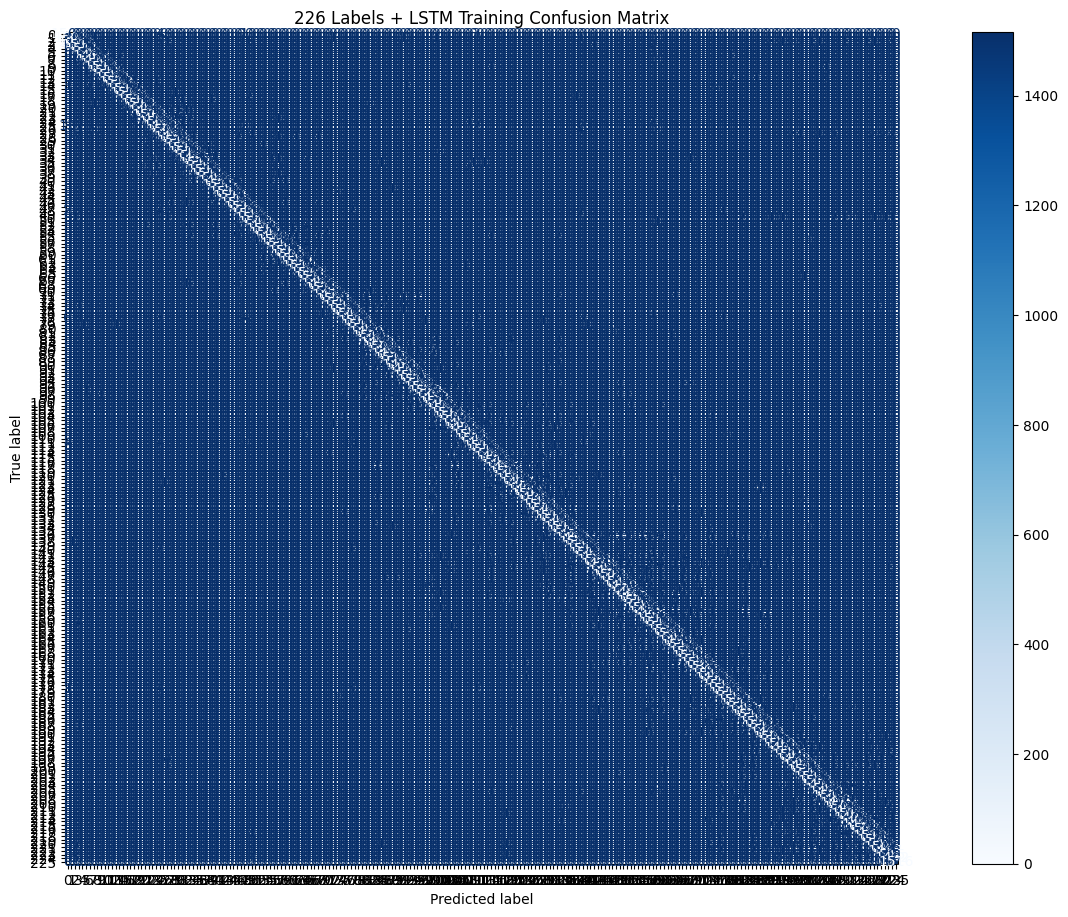

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(x_train_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_train_encoded, y_pred_classes)

# Create a figure with a high resolution (e.g., 1080x1920 pixels)
plt.figure(figsize=(19.2, 10.8))  # 1920/100 and 1080/100 for a 100 DPI image

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train_encoded))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Plot on the current larger axis

# Customize the plot
plt.title(f"{len(labels)} Labels + LSTM Training Confusion Matrix")

# Save the figure in high resolution (1080x1920)
plt.savefig("../data/outputs/Train confusion_matrix_1080x1920.png", dpi=100, bbox_inches='tight')  # You can increase DPI for higher quality
plt.show()


In [ ]:
# Assuming validation_accuracy is a single numeric value
model_name = f'{len(labels)}_labels' + f"{validation_accuracy[-1]:.4f}"
model.save(f"../models/Model_{model_name}.h5")  # Save with .h5 extension
print(f"Model {model_name} was saved.")

Model 226_labels0.9475 was saved.


In [24]:
import joblib
joblib.dump(scaler, f"../models/scaler{validation_accuracy[-1]:.4f}.pkl")
joblib.dump(label_encoder, f"../models/label_encoder{validation_accuracy[-1]:.4f}.pkl")

['../models/label_encoder0.9475.pkl']